In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from scipy.stats import binned_statistic
import rubin_sim.maf as maf


In [2]:
filename='franken_v2.99_0yrs.db'

bundleList = []

nside=64
metric = maf.CountMetric(col='night')
for filtername in 'riz':
    sql = 'night < 366 and visitExposureTime < 20 and filter="%s"' % filtername

    slicer = maf.HealpixSlicer(
            nside=nside,
            latCol='altitude',
            lonCol='azimuth',
            useCache=False)
    plotFuncs = [maf.plots.LambertSkyMap()]
    plotDict = {"norm": "log",
               'xlabel': 'N Observations'}

    bundle = maf.MetricBundle(
                metric,
                slicer,
                sql,
                plotFuncs=plotFuncs,
                plotDict=plotDict,
            )
    bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metricBundles/metricBundleGroup.py:293: UserWarning: No data matching constraint night < 366 and visitExposureTime < 20 and filter="z"
  warnings.warn("No data matching constraint %s" % constraint)
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metricBundles/metricBundleGroup.py:300: UserWarning:  This means skipping metrics ['Count night : night < 366 and visitExposureTime < 20 and z : HealpixSlicer']
  warnings.warn(" This means skipping metrics %s" % metricsSkipped)
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:608: UserWarning: MetricBundle (opsim_Count_night_night_lt_366_and_visitExposureTime_lt_20_and_z_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


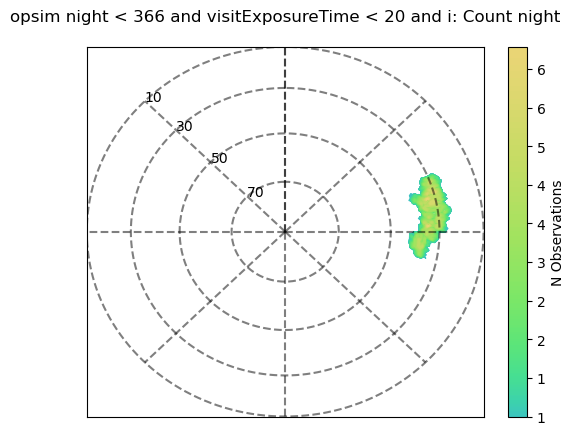

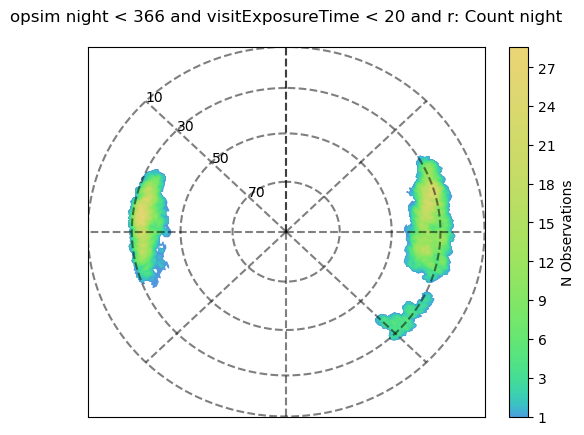

<Figure size 640x480 with 0 Axes>

In [3]:
bg = maf.MetricBundleGroup(bundleList, filename, 'temp', None)
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
